In [9]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df.shape

(150, 4)

# Data processing

In [14]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [15]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df[df.target ==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [17]:
df[df.target ==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [18]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df[120:125]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
120,6.9,3.2,5.7,2.3,2,virginica
121,5.6,2.8,4.9,2.0,2,virginica
122,7.7,2.8,6.7,2.0,2,virginica
123,6.3,2.7,4.9,1.8,2,virginica
124,6.7,3.3,5.7,2.1,2,virginica


In [20]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

# sepal length vs sepal width (setosa vs versicolor)

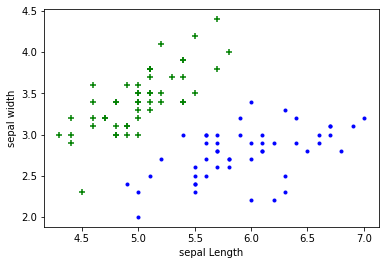

In [22]:
plt.xlabel('sepal Length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green", marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue", marker='.')


# petal length vs petal width (setosa vs virginica)

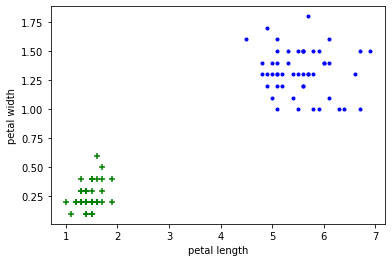

In [23]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color="green", marker='+')
plt.scatter(df2['petal length (cm)'],df1['petal width (cm)'],color="blue", marker='.')


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = df.drop(['target' , 'flower_name'],axis='columns')
y = df.target

In [26]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state=2)

In [27]:
len(x_train)

120

In [28]:
len(x_test)

30

# create KNN(K Nearest  Neighbors) classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [49]:
knn.score(x_test,y_test)

0.9666666666666667

In [50]:
from sklearn.metrics import confusion_matrix
y_pred =knn.predict(x_test)
cm =confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]], dtype=int64)

Text(42.0, 0.5, 'Truth')

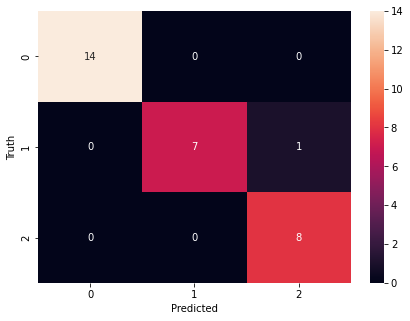

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot =True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

